In [97]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

from sklearn.datasets import load_iris


In [98]:
x = np.array([1,2,3,4,5,6,7,8,9,10])
y = np.array([0,0,0,0,0,1,1,1,1,1])

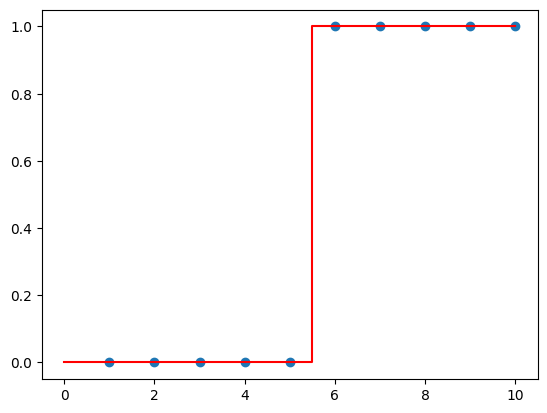

In [99]:
plt.scatter(x,y)
plt.plot([0,5.5,5.5,10],[0,0,1,1],'r')

In [100]:
model = LogisticRegression()
model.fit(x.reshape(-1,1),y)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [101]:
model.score(x.reshape(-1,1),y)  # Accuracy (F1_score)  چند درصد رو درست دسته بندی کرده
                                # in binary classification under 50 is bad

1.0

In [102]:
x,y = load_iris(return_X_y=True)

In [103]:
x.shape,y.shape

((150, 4), (150,))

In [104]:
data = load_iris(as_frame=True)
data['data'],data['target']

(     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
 0                  5.1               3.5                1.4               0.2
 1                  4.9               3.0                1.4               0.2
 2                  4.7               3.2                1.3               0.2
 3                  4.6               3.1                1.5               0.2
 4                  5.0               3.6                1.4               0.2
 ..                 ...               ...                ...               ...
 145                6.7               3.0                5.2               2.3
 146                6.3               2.5                5.0               1.9
 147                6.5               3.0                5.2               2.0
 148                6.2               3.4                5.4               2.3
 149                5.9               3.0                5.1               1.8
 
 [150 rows x 4 columns],
 0      0
 1      0
 2   

In [105]:
t = data['target']
d = data['data']

In [106]:
t.astype('category').describe()

count     150
unique      3
top         0
freq       50
Name: target, dtype: int64

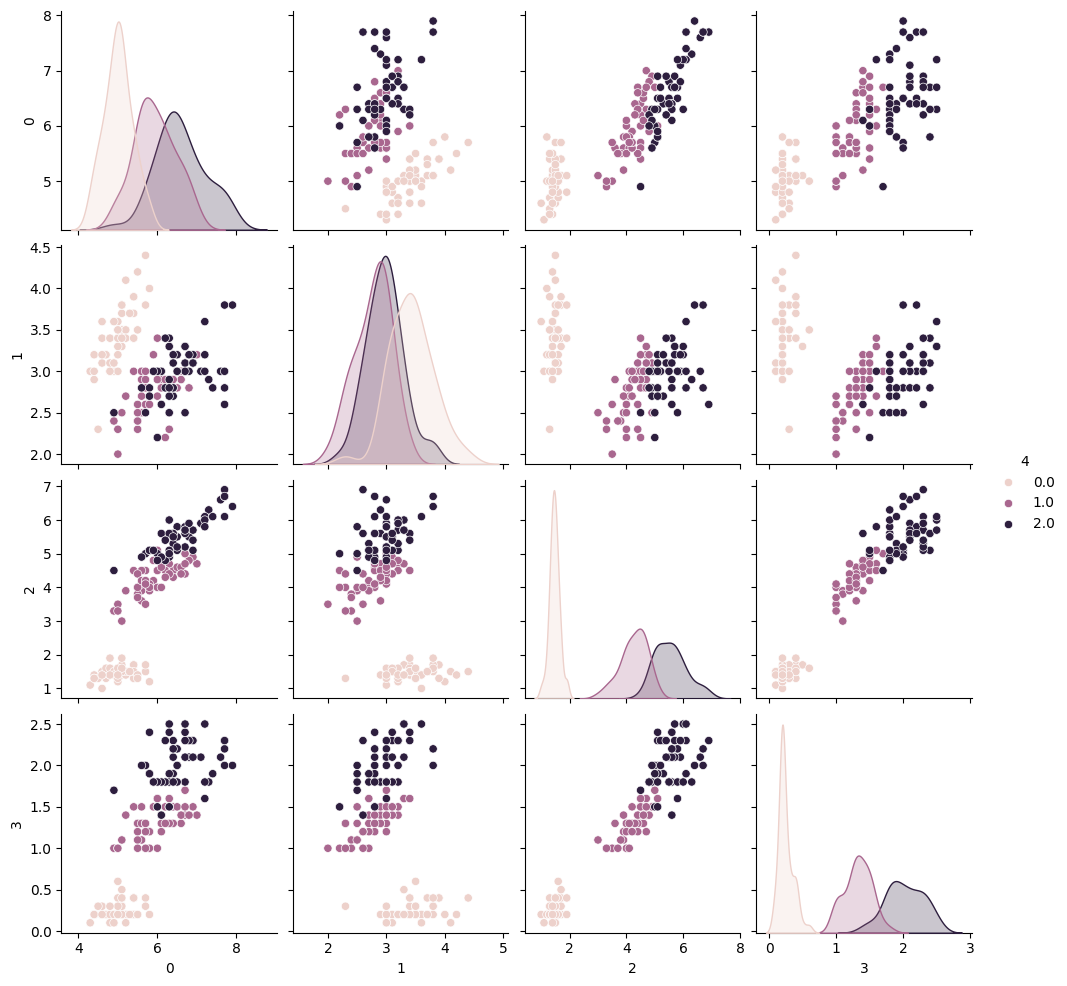

In [107]:
df = pd.DataFrame(np.hstack((x,y.reshape(-1,1))))
sns.pairplot(df ,hue=4)  # باید هیو هم داخل همون دیتا فریم باشه


In [108]:
d['target'] = data['target']
d

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


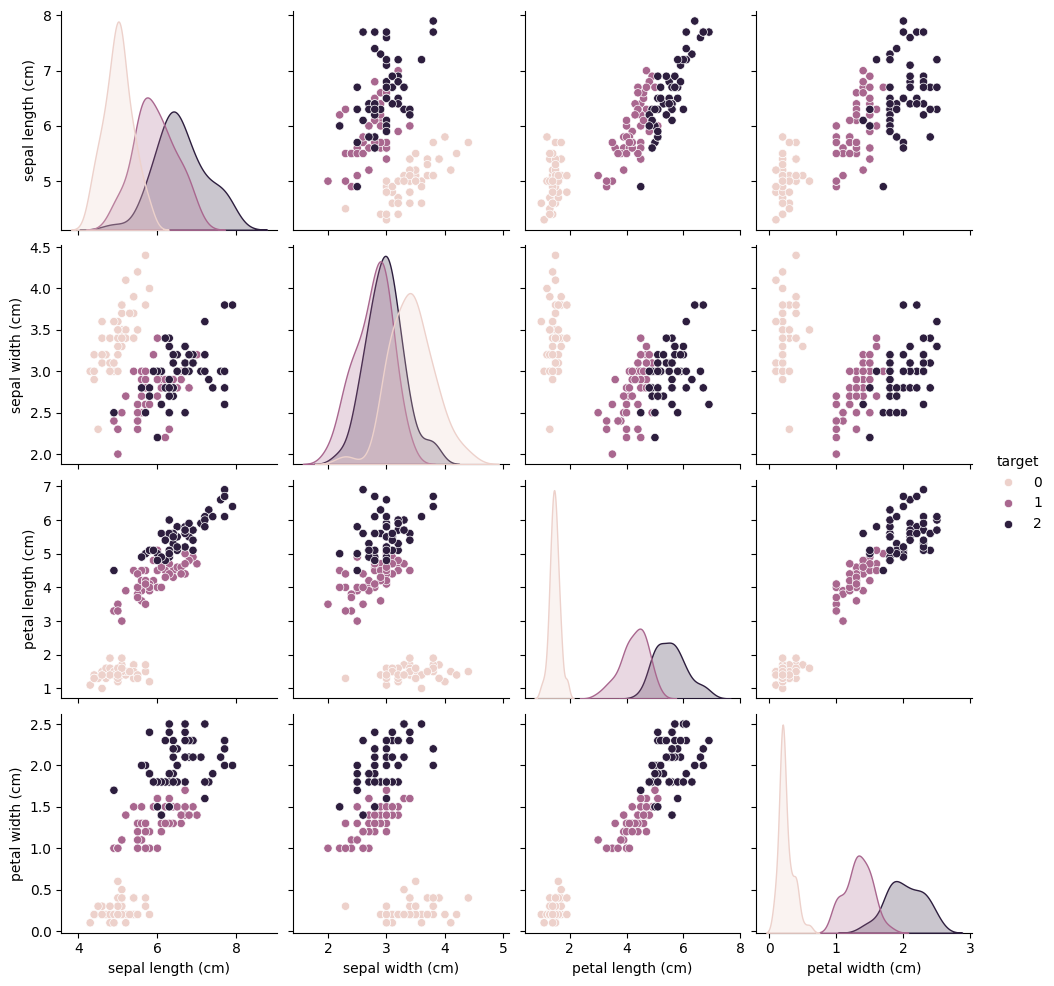

In [109]:
sns.pairplot(d ,hue='target')

In [110]:
# filter target 2
data2 = d[d['target']!=2]
data2

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
95,5.7,3.0,4.2,1.2,1
96,5.7,2.9,4.2,1.3,1
97,6.2,2.9,4.3,1.3,1
98,5.1,2.5,3.0,1.1,1


<Axes: >

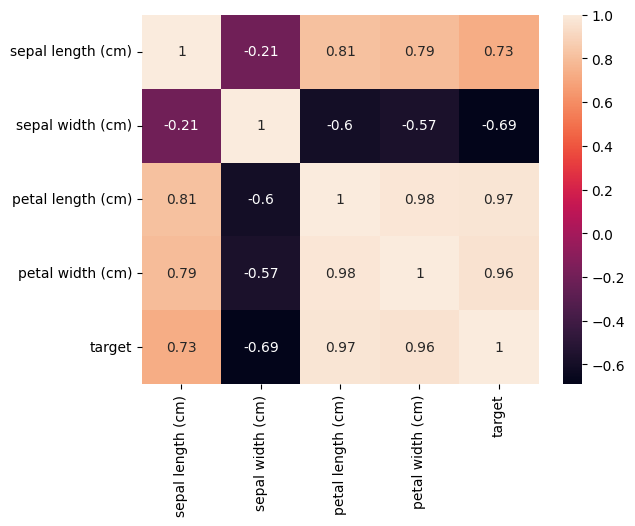

In [111]:
sns.heatmap(data2.corr(),annot=True)

In [112]:
x2 = data2.drop('target',axis=1).values
y2 = data2['target'].values
x2,y2

(array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
        [5

In [113]:
X_train, X_test, y_train, y_test = train_test_split(x2,y2,test_size=0.1)

- C=1 -> هر چقدر این بیشتر باشه مدل ما ساده تر میشه
- dual = False  -> (اگه سمپل ها بیشتر از نمونه ها باشه فالس باشه بهتره)
(اکه ان باشه میاد جای تابع اصلی تابع دوگان رو حل میکنه که ساده تر و سریع تره)
- solver: 'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'

![alt text](log.png)

- sag -> حجم دیتا زیاد بود  
- lbfgs -> دقیق ترین ولی سرعت کم برای دیتای زیاد

In [114]:
model = LogisticRegression(C=0.65,solver='sag') 

In [115]:
model.fit(X_train,y_train)

c:\Users\Taha\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,0.65
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'sag'
,max_iter,100
,multi_class,'deprecated'


In [116]:
model.score(X_train,y_train)

1.0

In [117]:
model.score(X_test,y_test)


1.0

اورفیته الان

In [118]:
X_test[0]

array([6.3, 2.5, 4.9, 1.5])

In [119]:
v = np.array([3.9, 3.2 , 4.4, 1.2])
v.shape

(4,)

In [120]:
model.predict(v.reshape(1,-1))

array([1])

In [121]:
x2 = data2.drop(["target"], axis=1).values
y2 = data2["target"].values
x2, y2

(array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
        [5

In [122]:
X_train, X_test, y_train, y_test = train_test_split(x2,y2,test_size=0.1)

In [123]:
T = PolynomialFeatures(degree=2)
x_new  = T.fit_transform(X_train)

In [124]:
model = LogisticRegression(C=0.65,solver='sag') 

In [125]:
model.fit(x_new,y_train)

c:\Users\Taha\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,0.65
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'sag'
,max_iter,100
,multi_class,'deprecated'


In [126]:
model.score(x_new,y_train)

1.0

In [127]:
x_test_new = T.transform(X_test)

In [128]:
model.score(x_test_new,y_test)


1.0

# بریم برای 3 پارامتر

In [129]:
data2 = d
data2

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [130]:
x2 = data2.drop(["target"], axis=1).values
y2 = data2["target"].values
x2, y2

(array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
        [5

In [131]:
X_train, X_test, y_train, y_test = train_test_split(x2,y2,test_size=0.1)

In [132]:
model = LogisticRegression(C=0.65) 

In [133]:
model.fit(X_train,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,0.65
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [134]:
model.score(X_train,y_train)

0.9629629629629629

In [135]:
model.score(X_test,y_test)


1.0

- LogisticRegression -> برای 2 تا کلاسه
- وقتی تعداد کلاس بیشتر باشه میاد 3 تا لاجستیک حل میکنه و به صورت 01 جواب میده

In [136]:
model.classes_

array([0, 1, 2])

In [137]:
model.coef_

array([[-0.4176276 ,  0.79150463, -2.16556501, -0.90623018],
       [ 0.36086729, -0.3188787 , -0.09705296, -0.70274158],
       [ 0.0567603 , -0.47262593,  2.26261797,  1.60897176]])

In [138]:
model.intercept_

array([  8.76657422,   2.19093852, -10.95751274])

In [139]:
v = np.array([3.9, 3.2 , 4.4, 1.2])


In [140]:
model.predict(v.reshape(1,-1))

array([1])

In [141]:
r = model.predict_proba(v.reshape(1,-1)) # احتمال حصور داخل هر کلاس رو میده
r

array([[0.08125549, 0.77317498, 0.14556953]])

In [142]:
np.argmax(r)

np.int64(1)